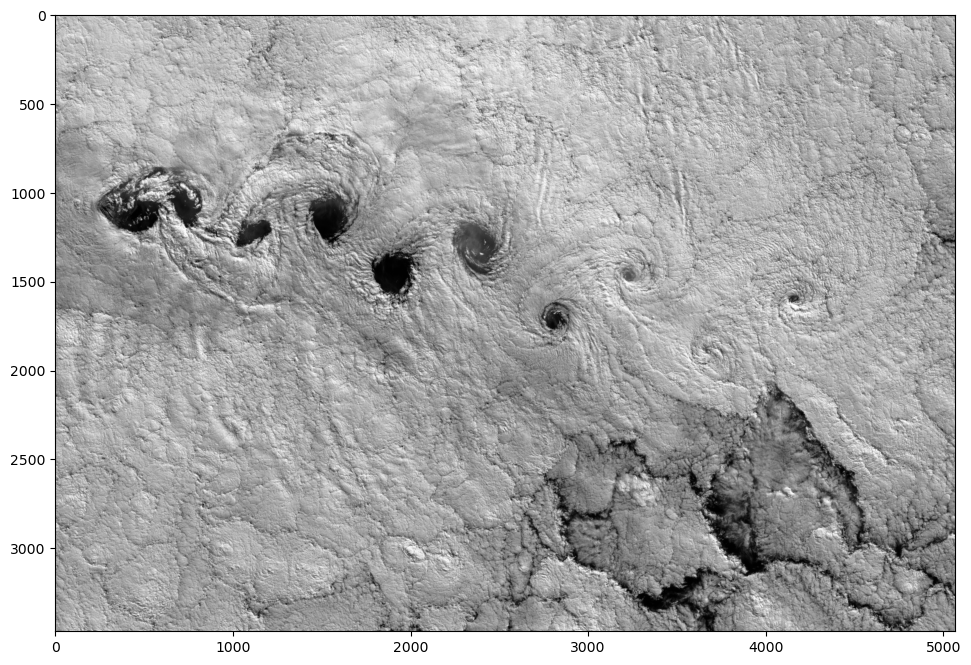

In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]
A =imread(os.path.join('.','Karman_vortex.jpg'))
X = np.mean(A,-1); # Convert RGB to grayscale
img = plt.imshow(X, cmap = plt.get_cmap('gray'))
plt.show()


In [5]:
# Perform the economy SVD
U, s, Vt = np.linalg.svd(X, full_matrices=False)

# The shape of U, s, and Vt gives us the dimensions of the economy SVD
(U.shape, s.shape, Vt.shape), s[:5]  # Display the shapes and first 5 singular values


(((3468, 3468), (3468,), (3468, 5068)),
 array([670865.81628374,  66334.35514964,  38078.6954046 ,  31447.15147421,
         26575.77201952]))

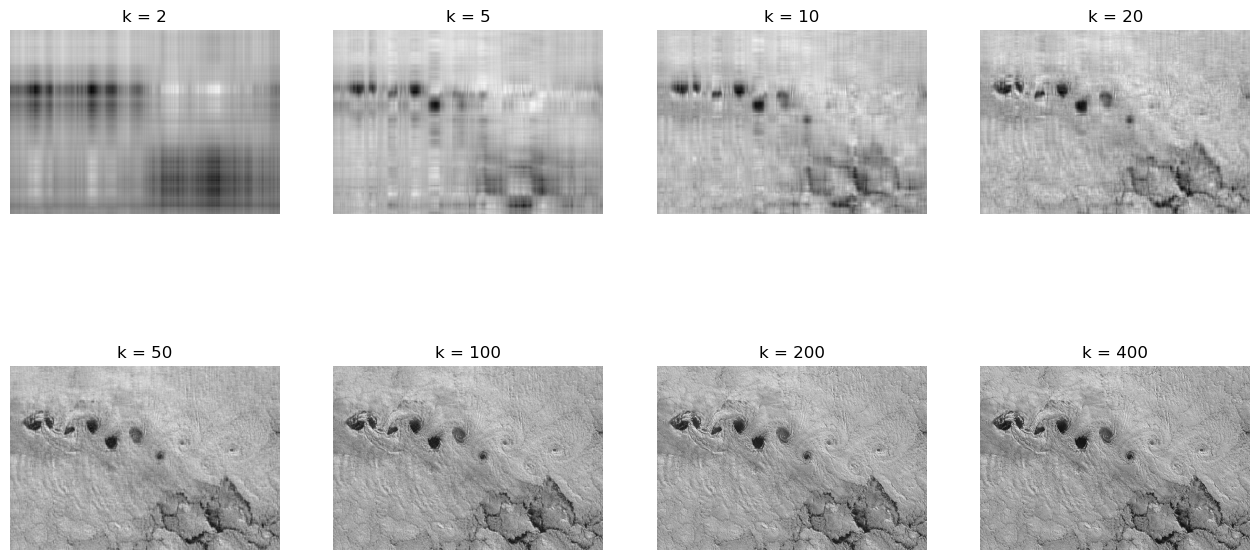

In [6]:
def reconstruct(U, s, Vt, k):
    """reconstruct the original matrix from the SVD components using the first k singular values"""
    return U[:,:k] @ np.diag(s[:k]) @ Vt[:k,:]

ks = [2, 5, 10, 20, 50, 100, 200, 400]
reconstruct_error = []
fig, ax = plt.subplots(2, 4, figsize=(16,8))
ax = ax.flatten()
# Plot the original and reconstructed images
for i, k in enumerate(ks):
    # Reconstruct from the first k singular values
    Xhat = reconstruct(U, s, Vt, k)
    reconstruct_error.append(np.linalg.norm(X-Xhat)/np.linalg.norm(X))
    # Plot the reconstructed image
    ax[i].imshow(Xhat, cmap=plt.get_cmap('gray'))
    ax[i].set_title(f'k = {k}')
    ax[i].axis('off')
plt.show()    

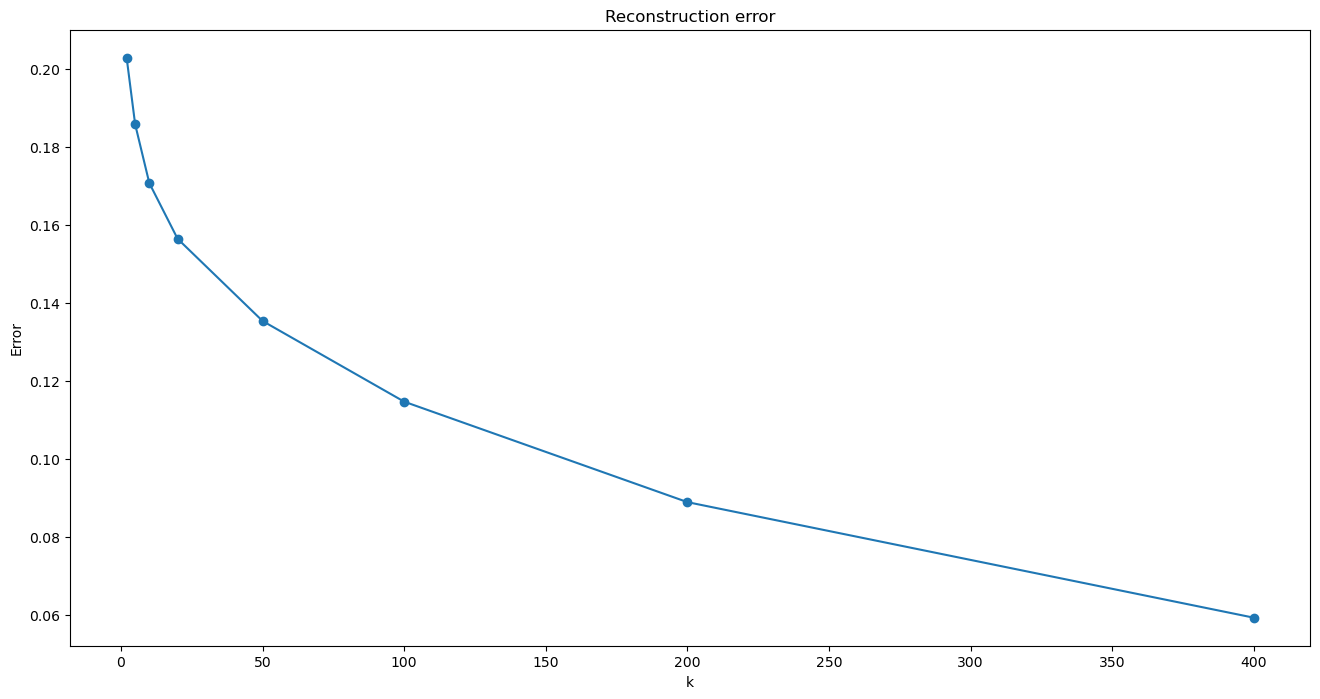

In [7]:
plt.figure()
plt.plot(ks, reconstruct_error, 'o-')
plt.title('Reconstruction error')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

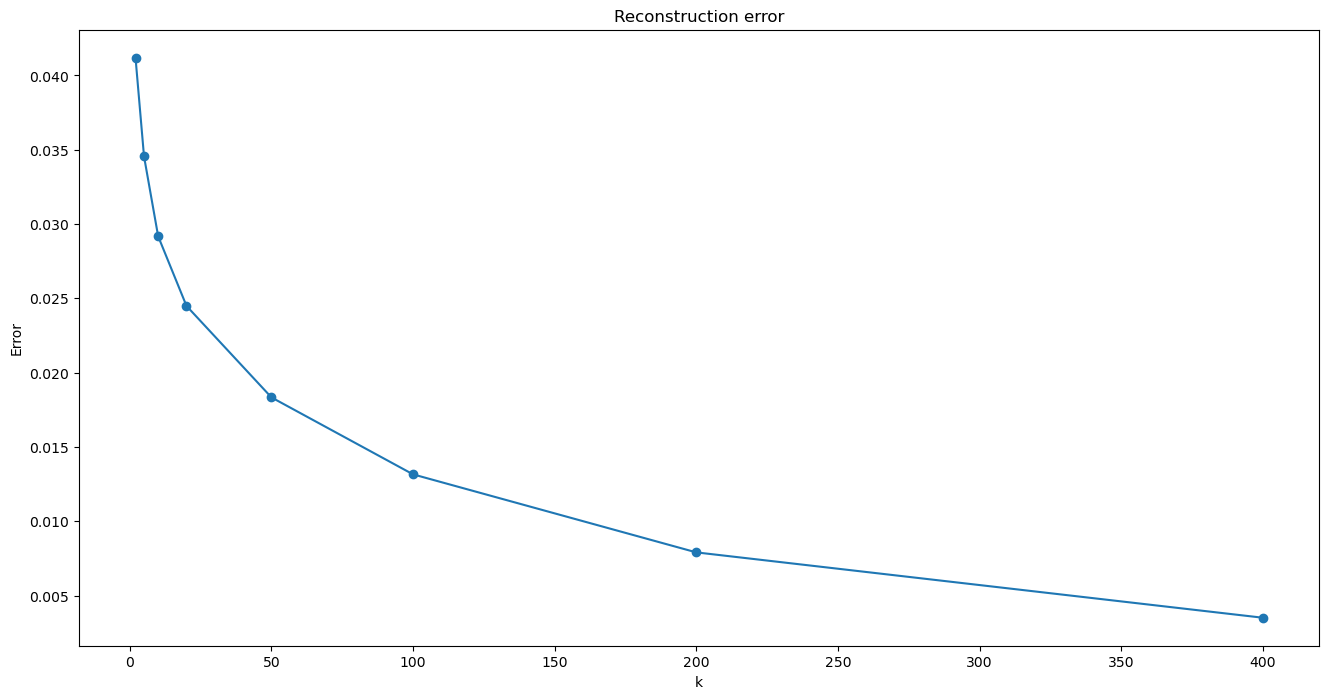

In [8]:
squared_error = [e**2 for e in reconstruct_error]
plt.figure()
plt.plot(ks, squared_error, 'o-')
plt.title('Reconstruction error')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

In [9]:
# Find k where squared_error ~ 0.01

k = 100
for i in range(k, 200):
    reconstruct_error = (np.linalg.norm(X-reconstruct(U, s, Vt, i))/np.linalg.norm(X))**2
    if reconstruct_error < 0.01:
        print(f'k = {i}, error = {reconstruct_error}')
        break

k = 152, error = 0.009952102569337262


In [10]:
# Calculate the total variance
total_variance = np.sum(s**2)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(s**2)

# Find the rank r_tilde such that 99% of the total variance is captured
r_tilde = np.argmax(cumulative_variance >= 0.99 * total_variance) + 1  # +1 to correct the index

# Return r_tilde and the exact percentage of variance captured
r_tilde, cumulative_variance[r_tilde - 1] / total_variance

(152, 0.9900478974306623)

## Exercise 2

In [11]:
num_points = 100

# 100 random points in the range [0, 1]
X = np.random.rand(num_points)
# random noise in the range [-0.2, 0.2]
random_noise = 0.4 * np.random.rand(num_points) - 0.2
Y = np.cos(4 * np.pi * X) + random_noise
X, Y

(array([0.26871699, 0.50273409, 0.06012275, 0.02958988, 0.8072994 ,
        0.16619193, 0.64834632, 0.24819733, 0.32128549, 0.18351996,
        0.94294638, 0.15510277, 0.88267725, 0.9959065 , 0.95348414,
        0.83299415, 0.65218984, 0.32143394, 0.89704174, 0.62785889,
        0.1191902 , 0.77934196, 0.39265758, 0.72110554, 0.40877819,
        0.85168551, 0.26809943, 0.69075506, 0.45187233, 0.95759826,
        0.30426854, 0.3599306 , 0.73164024, 0.80260821, 0.49996655,
        0.80076748, 0.43231556, 0.31186406, 0.83791968, 0.0766385 ,
        0.41899037, 0.88939298, 0.23774688, 0.98298513, 0.24141297,
        0.10852346, 0.77811648, 0.19474148, 0.95695409, 0.70510783,
        0.99447702, 0.01778475, 0.11198571, 0.58677054, 0.77658871,
        0.15290932, 0.59943187, 0.11023151, 0.82269197, 0.46335869,
        0.08407945, 0.98223011, 0.5111453 , 0.79634178, 0.58949816,
        0.95721846, 0.48888204, 0.65844796, 0.66841575, 0.33725097,
        0.08727306, 0.9782735 , 0.77361209, 0.87

Degree 2, alpha 0.0: [ 0.7786124 -2.549513   2.8611333]
Degree 2, alpha 0.1: [ 0.7848611 -2.583803   2.8821924]
Degree 2, alpha 0.2: [ 0.79011965 -2.616427    2.908331  ]
Degree 2, alpha 0.5: [ 0.7883466 -2.6560578  3.0724294]
Degree 4, alpha 0.0: [   1.181878  -15.51042    66.602196 -104.76143    54.105476]
Degree 4, alpha 0.1: [   1.2614903  -17.038393    72.89871   -114.08649     58.60311  ]
Degree 4, alpha 0.2: [   1.3534739  -18.779875    80.051994  -124.635796    63.674503 ]
Degree 4, alpha 0.5: [   1.8386852  -26.942974   112.726036  -172.0355      86.11394  ]
Degree 6, alpha 0.0: [  1.6943471 -21.224552   63.491325  -35.372494  -42.684227    2.7513862
  33.64806  ]
Degree 6, alpha 0.1: [  1.7347312 -21.607449   65.07564   -37.60134   -42.7329      5.0338836
  32.41415  ]
Degree 6, alpha 0.2: [  1.7889295 -22.040045   66.88019   -40.206104  -42.663246    7.619361
  30.945873 ]
Degree 6, alpha 0.5: [  2.1381254 -24.57416    77.04067   -54.78128   -42.39715    22.335878
  22.28963

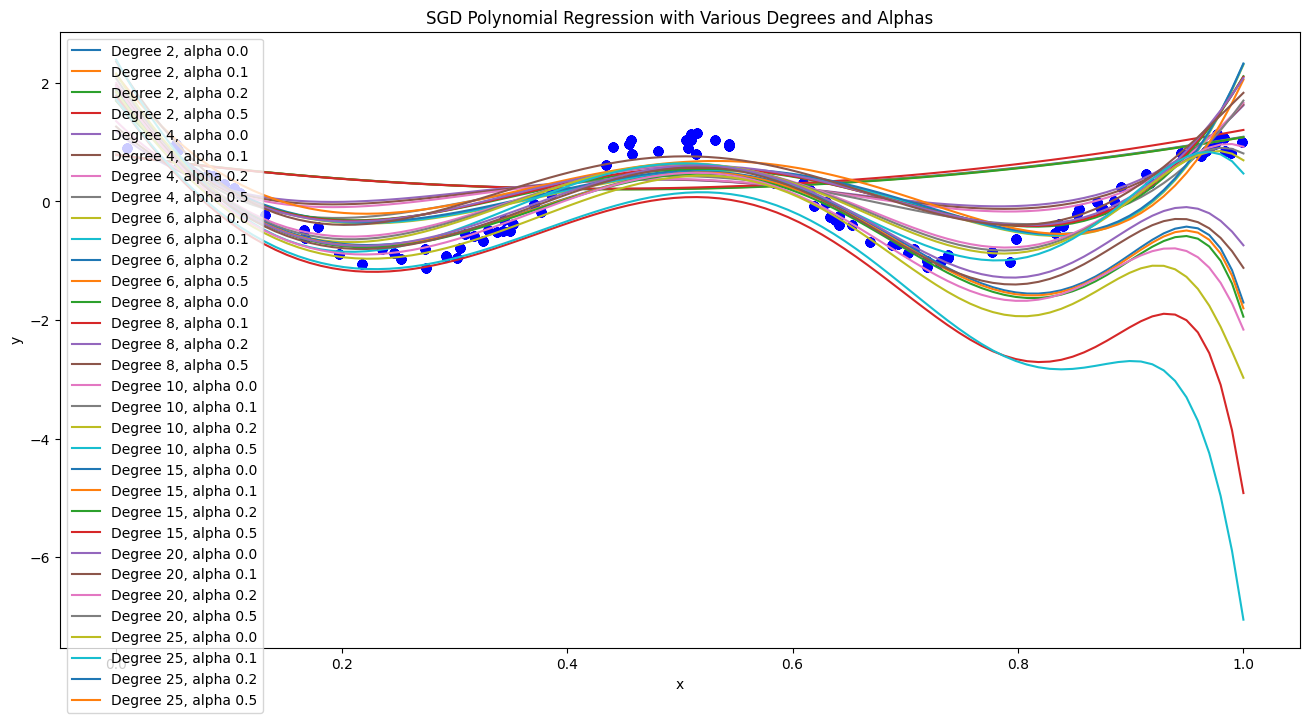

{(2, 0.0): Array([ 0.7786124, -2.549513 ,  2.8611333], dtype=float32),
 (2, 0.1): Array([ 0.7848611, -2.583803 ,  2.8821924], dtype=float32),
 (2, 0.2): Array([ 0.79011965, -2.616427  ,  2.908331  ], dtype=float32),
 (2, 0.5): Array([ 0.7883466, -2.6560578,  3.0724294], dtype=float32),
 (4,
  0.0): Array([   1.181878,  -15.51042 ,   66.602196, -104.76143 ,   54.105476],      dtype=float32),
 (4,
  0.1): Array([   1.2614903,  -17.038393 ,   72.89871  , -114.08649  ,
          58.60311  ], dtype=float32),
 (4,
  0.2): Array([   1.3534739,  -18.779875 ,   80.051994 , -124.635796 ,
          63.674503 ], dtype=float32),
 (4,
  0.5): Array([   1.8386852,  -26.942974 ,  112.726036 , -172.0355   ,
          86.11394  ], dtype=float32),
 (6,
  0.0): Array([  1.6943471, -21.224552 ,  63.491325 , -35.372494 , -42.684227 ,
          2.7513862,  33.64806  ], dtype=float32),
 (6,
  0.1): Array([  1.7347312, -21.607449 ,  65.07564  , -37.60134  , -42.7329   ,
          5.0338836,  32.41415  ], dtype

In [4]:
import jax
import jax.numpy as jnp

x = np.random.rand(100)
epsilon = np.random.uniform(-0.2, 0.2, 100)
y = np.cos(4 * np.pi * x) + epsilon

# Define the model function for polynomial regression
def model(params, x):
    # Horner's method for polynomial evaluation
    return jnp.polyval(params[::-1], x)

# Define the loss function
def loss(params, x, y):
    preds = model(params, x)
    return jnp.mean((preds - y) ** 2)

grad_fn = jax.grad(loss)
grad_fn = jax.jit(grad_fn)

def sgd_poly_regression(x, y, degree, learning_rate, alpha, epochs):
    coeffs = np.random.uniform(-0.4, 0.4, degree + 1)
    velocity = np.zeros(degree + 1)
    
    for i in range(epochs):
        print('Epoch', i, end='\r')
        for j in range(0, len(x)):
            gradients = grad_fn(coeffs, x[j], y[j])
            velocity = alpha * velocity - learning_rate * gradients
            coeffs += velocity

    return coeffs

degrees = [2, 4, 6, 8, 10, 15, 20, 25]  # Different degrees of the polynomial
alphas = [0.0, 0.1, 0.2, 0.5]  # Different momentum terms
results = {}

for degree in degrees:
    for alpha in alphas:
        coeffs = sgd_poly_regression(x, y, degree, learning_rate=0.1, alpha=alpha, epochs=10000)
        results[(degree, alpha)] = coeffs
        print(f'Degree {degree}, alpha {alpha}: {coeffs}')
        plt.scatter(x, y, color='blue', label='Data points' if degree == 1 and alpha == 0 else "")
        curve_x = jnp.linspace(0, 1, 100)
        curve_y = jnp.polyval(coeffs[::-1], curve_x)
        plt.plot(curve_x, curve_y, label=f'Degree {degree}, alpha {alpha}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD Polynomial Regression with Various Degrees and Alphas')
plt.legend()
plt.show()

results


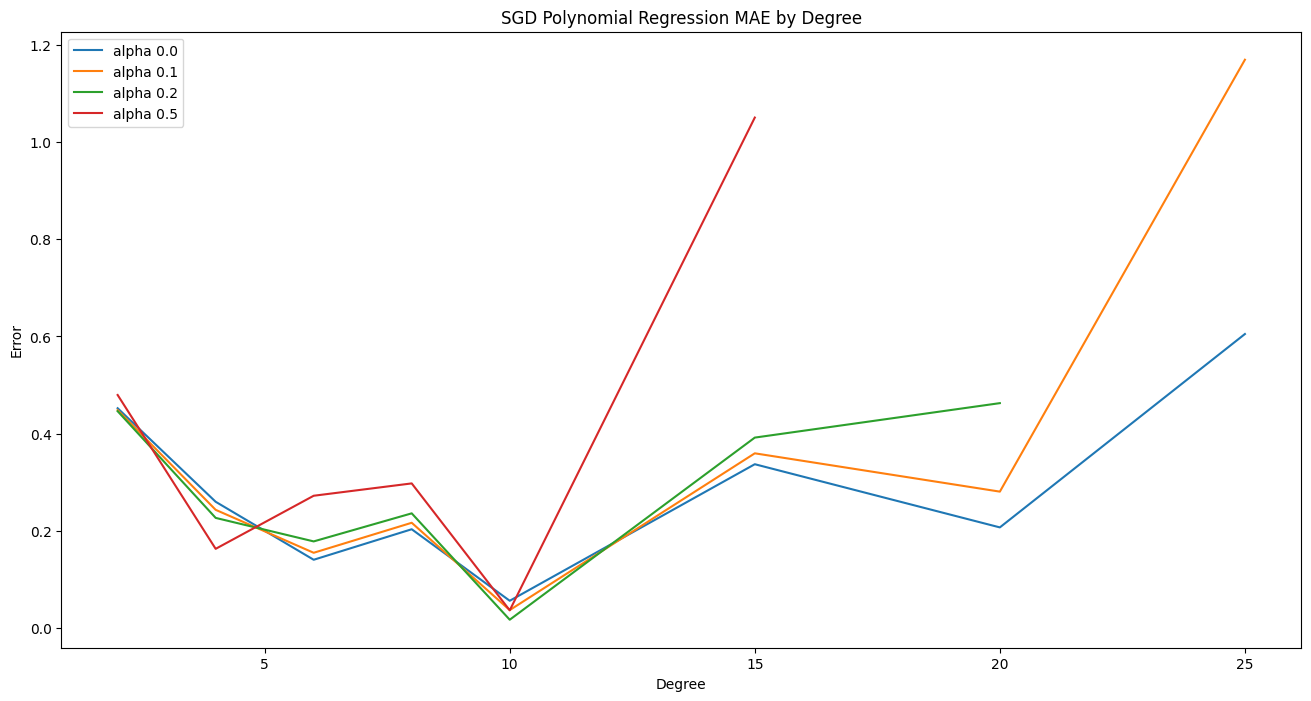

In [9]:
# plot error by degree
plt.figure()
for alpha in alphas:
    error = []
    for degree in degrees:
        coeffs = results[(degree, alpha)]
        curve_x = jnp.linspace(0, 1, 100)
        curve_y = jnp.polyval(coeffs[::-1], curve_x)
        error.append(jnp.abs(jnp.mean((curve_y - jnp.cos(4 * np.pi * curve_x)))))
    plt.plot(degrees, error, label=f'alpha {alpha}')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('SGD Polynomial Regression MAE by Degree')
plt.legend()
plt.show()